# Playing with generator

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
/private/home/sdascoli/recur/notebooks
(-7 sub 6)
[3.0577524373858367, -13, -13, -13, -13, -13, -13, -13, -13, -13, -13, -13, -13, -13, -13]


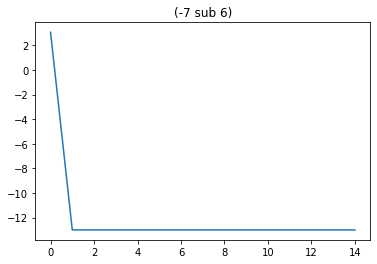

1

In [39]:
#%%timeit
import glob
import os
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import torch
import numpy as np
import sys
import copy
from pathlib import Path
#from src.envs.generators import RandomRecurrence
#from src.envs.encoders import Equation, IntegerSeries, RealSeries
from sympy import *
import pickle
from collections import defaultdict, OrderedDict
import math

%load_ext autoreload
%autoreload 2

%cd ~/recur/notebooks
sys.path.append('/private/home/sdascoli/recur')
import src
from src.envs.generators import RandomRecurrence
from src.envs.encoders import Equation

class params:
    float_precision = 3
    max_len = 15
    max_ops = 2
    max_degree = 2
    max_number = 1e100
    real_series = True
    max_exponent = 100
    init_scale = 10
    prob_const=1/3
    prob_n = 1/3
    max_int = 10
    prob_rand = 0.
    dimension=1
    
generator = RandomRecurrence(params)

rng = np.random.RandomState(0)
tree, series = generator.generate(rng, length=15, nb_ops = 1)
print(tree)
print(series)
for i in range(params.dimension):
    plt.title(tree.infix())
    plt.plot(series[i::params.dimension])
#plt.yscale('symlog')
plt.show()

ending = np.array(series[-5:])
gaps = abs(ending[1:]-ending[:-1])
len(set(gaps))

# Checking encoder

In [99]:
class params:
    int_base = 10
    has_separator = False
    
encoder = Equation(params)
print(tree.infix())
encoded = encoder.encode(tree)
print(encoded)
decoded = encoder.decode(encoded)
print(decoded.infix())

(x-0-1 div n) | (n sub x-0-1)
['div', 'x-0-1', 'n', '|', 'sub', 'n', 'x-0-1']
(x-0-1 div n) | (n sub x-0-1)


In [159]:
class params:
    a=1
    
from src.envs.encoders import RealSeries

encoder = RealSeries(params)
x = series
print(x)
encoded = encoder.encode(x)
print(encoded)
decoded = encoder.decode(encoded)
print(decoded)

[0.5005344306858779, -3.499465569314122, -7.499465569314122, -11.499465569314122, -15.499465569314122, -19.499465569314122, -23.499465569314122, -27.499465569314122, -31.499465569314122, -35.499465569314125, -39.499465569314125, -43.499465569314125, -47.499465569314125, -51.499465569314125, -55.499465569314125, -59.499465569314125, -63.499465569314125, -67.49946556931413, -71.49946556931413, -75.49946556931413, -79.49946556931413, -83.49946556931413, -87.49946556931413, -91.49946556931413, -95.49946556931413, -99.49946556931413, -103.49946556931413, -107.49946556931413, -111.49946556931413, -115.49946556931413, -119.49946556931413]
['+', 'N50053', 'E-5', '-', 'N-34995', 'E-4', '-', 'N-74995', 'E-4', '-', 'N-11499', 'E-3', '-', 'N-15499', 'E-3', '-', 'N-19499', 'E-3', '-', 'N-23499', 'E-3', '-', 'N-27499', 'E-3', '-', 'N-31499', 'E-3', '-', 'N-35499', 'E-3', '-', 'N-39499', 'E-3', '-', 'N-43499', 'E-3', '-', 'N-47499', 'E-3', '-', 'N-51499', 'E-3', '-', 'N-55499', 'E-3', '-', 'N-59499',